# Double-Slit Simulation
### Here I will be creating a simulation of Young's double-slit experiment by uniform random variables into a cumulative density function. Each graphed point is a particle interfering with itself to create the banded pattern apparent in Young's findings.
### The function takes parameters of wavelength, slit size, slit distance, and screen distance.

In [112]:
import numpy as np
from numpy import pi
import matplotlib.pyplot as plt
from scipy import integrate

First of all, we need to define our actual physical formulae. In the double-slit scenario, the most important formulae are the following:
$$\Delta =d\sin{\theta}$$
(Path difference)
$$I = \frac{EB}{2\mu_0} = \frac{cB^2}{2\mu_0}$$
Remember from last year the definition of the magnetic field for an EM wave:
$$B = B_0\cos\left(\omega t-kr+\phi\right)$$
So for a plane EM wave, we ultimately get:
$$I = \frac{cB_0^2\cos^2\left(\omega t + kr + \phi\right)}{2\mu_0} = \frac{cB_0^2\cos\left(2\left(\omega t + kr + \phi\right)\right)}{4\mu_0}$$
Defining $I_0 = \frac{cB_0^2}{4\mu_0}$ we then have:
$$I\left(r,t\right)=I_0\cos\left(2\left(\omega t + kr + \phi\right)\right)$$

This confirms the sinusoidal nature of the intensity of light, which we can now use to create our interference patterns.

First, let's make our path difference function:

In [113]:
def delta(d,x,L):
    theta = np.arctan2(x,L)
    return d * np.sin(theta)
# Child's play.

Next up, let's make our intensity function. We have two intensity formulae for the two parts of the problem. First is single-slit diffraction:
$$I_{diffraction}=I_0\left(\frac{\sin(\beta)}{\beta}\right)^2$$  

Up next is intensity of our interference pattern:
$$I_{interference}=I_0\cos^2\left(\frac{\pi\Delta}{\lambda}\right)$$

Which together become:
$$I(\theta)=I_0\cos^2\left(\frac{\pi \Delta}{\lambda}\right)\left(\frac{\sin\beta}{\beta}\right)^2$$

In [114]:
def intensity(x, I0, d, a, L, wavelength):
    delta_val = delta(d, x, L)
    interference = np.cos(pi * delta_val / wavelength) ** 2
        
    beta = (pi * a * x) / (wavelength / L)
    
    diffraction = np.where(beta != 0, (np.sin(beta) / beta) ** 2, 1) # we have to account for divide by zero
    
    return I0 * interference * diffraction

Let's graph this to make sure it looks good!

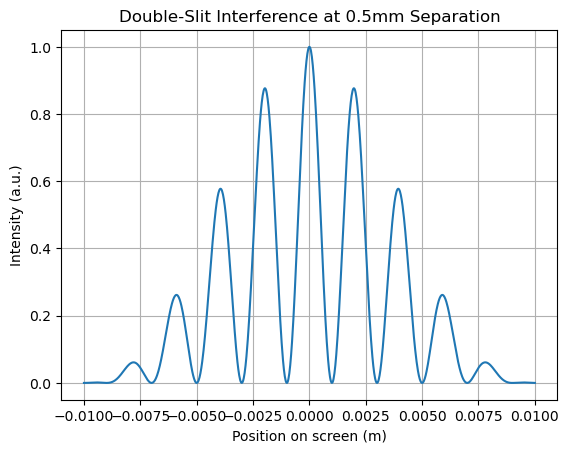

In [115]:
x = np.linspace(-0.01,0.01,1000)
I = intensity(x, 1, 0.5e-3,0.1e-3,1,1000e-9)

plt.title("Double-Slit Interference at 0.5mm Separation")
plt.xlabel("Position on screen (m)")
plt.ylabel("Intensity (a.u.)")
plt.grid()
plt.plot(x, I)

Up next we have to make a PDF then a CDF of this intensity function.
A probability density function takes the base function and integrates over $x \in \mathbb{R}$:

In [116]:
def PDF(x, I):
    
    integral = np.trapz(I, x)
    P = I / integral
    return P


In [117]:
def photons(x,P,count):
    CDF = np.cumsum(P)
    CDF /= CDF[-1] # Normalize from 0 to 1
    
    randomvals = np.random.rand(count)
    
    positions = np.array([np.interp(randomvals, CDF, x),np.random.randn(count)])
    return positions
    

In [118]:
# You can change this in your code to whatever you need it to be!
WAVELENGTH = 700e-9 
BASE_INTENSITY = 1.0 
SEPARATION = 0.5e-3 
SLIT_WIDTH = 0.1e-3 
SCREEN_DISTANCE = 1.5

PHOTON_COUNT = 1000000

In [119]:
x = np.linspace(-0.01,0.01,PHOTON_COUNT)

I = intensity(x, BASE_INTENSITY, SEPARATION, SLIT_WIDTH, SCREEN_DISTANCE, WAVELENGTH)
P = PDF(x,I)

positions = photons(x,P,PHOTON_COUNT)



Text(0.5, 1.0, 'Double-Slit Interference at 0.5mm Separation')

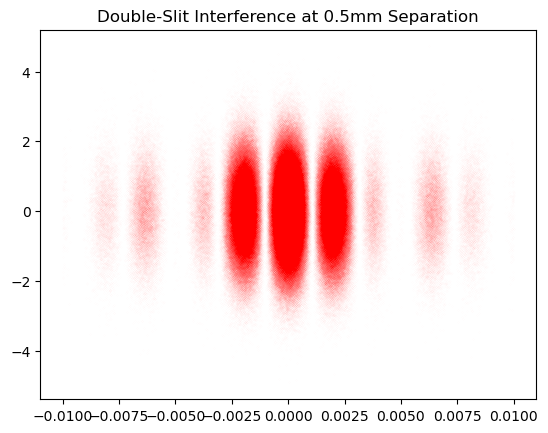

In [120]:
plt.plot(positions[0,:],positions[1,:],'.',markersize=0.01,color='red')
plt.title("Double-Slit Interference at " + str(SEPARATION*1000) + "mm Separation")

#### And at last, we have our desired output. 

The MIT License (MIT)

Copyright © 2024 Andrew J.W. Rosene

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the “Software”), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED “AS IS”, WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.